# Exercise 1: Linear Regression
> In this exercise, I will implement the Linear Regression with one variable and work with example data.
> * Input: Square feet (X)
> * Output: House price in $1000s (Y)
> * Number of training examples: 10

## Table of contents
* [1. Plotting the data](#C1)
* [2. Gradient Descent](#C2)
    * [2.1. Equations](Ex1_Linear_Regression.ipynb#C2_1)
    * [2.2. Implementation](#C2.2)
    * [2.3. Cost function $J(\theta)$](#C2.3)
    * [2.4. Gradient Descents](#C2.4)
* [3. Visualizing $J(\theta)$](#C3)

## 1. Plotting the data <a class="anchor" id="C1"></a>
This chapter show the graph of example data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('example_data.txt', sep=',', header=None)
df.columns = ['House Price ($1000s)', 'Square Feet']
pd.DataFrame(df)


,House Price ($1000s),Square Feet
0,245,1400
1,312,1600
2,279,1700
3,308,1875
4,199,1100
5,219,1550
6,405,2350
7,324,2450
8,319,1425
9,255,1700


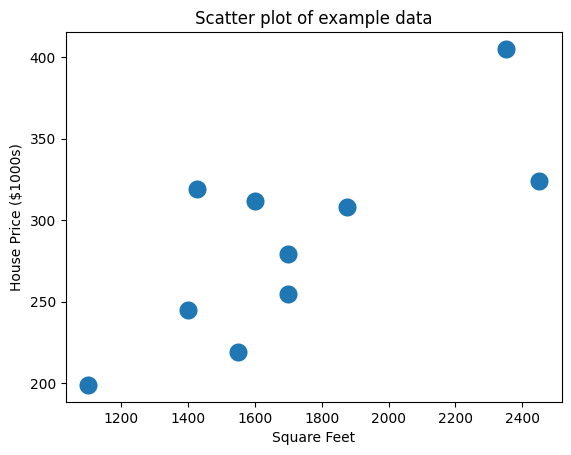

In [23]:
ax = sns.scatterplot(x='Square Feet', y='House Price ($1000s)', data=df, s = 200)
ax.set(xlabel='Square Feet', ylabel='House Price ($1000s)', title='Scatter plot of example data');

## 2. Gradient Descent <a class="anchor" id="C2"></a>
This chapter fit the linear regression parameters $\theta$ to the dataset using gradient descent

### 2.1. Equations <a id='C2_1'></a>
The hypothesis of linear regression is:
$$h_{\theta}(x)=\theta_{0} + \theta_{1} x_{1}$$
The objective of linear regression is to minimize the cost function (Root Mean Square Error RMSE):
$$J(\theta_{0},\theta_{1})=\frac{1}{2m} \Sigma(h_{\theta}(x^{(i)}) - y^{(i)})^2$$
To minimize the cost of $J(\theta)$ we will use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update:

$$\theta_{j} := \theta_{j} - \alpha \frac1m \Sigma(h_{\theta}(x^i) - y^i) x_{j}^{(i)}$$
(simultaneously update $\theta_{j}$ for all $j$ ). With each step of gradient descent, your parameters $\theta_{j}$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$ .

Note: $\Sigma$ (with $i=1$ to $m$)